In [90]:
# import the necessary libraries
import numpy as np 
import pandas as pd 
import os

# Visualisation libraries
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
sns.set()
import pycountry
import plotly.express as px
from plotly.offline import init_notebook_mode, iplot 
import plotly.graph_objs as go
import plotly.offline as py
from plotly.offline import download_plotlyjs,init_notebook_mode,plot,iplot
!pip install chart_studio
import chart_studio.plotly as py
import cufflinks
cufflinks.go_offline()
cufflinks.set_config_file(world_readable=True, theme='pearl')
#py.init_notebook_mode(connected=True)

#Geographical Plotting
import folium
from folium import Choropleth, Circle, Marker
from folium import plugins
from folium.plugins import HeatMap, MarkerCluster

#Racing Bar Chart
!pip install bar_chart_race
import bar_chart_race as bcr
from IPython.display import HTML

# Increase the default plot size and set the color scheme
plt.rcParams['figure.figsize'] = 8, 5
plt.style.use("fivethirtyeight")# for pretty graphs

# Disable warnings 
import warnings
warnings.filterwarnings('ignore')

In [2]:
os.chdir('..')
os.getcwd()

'C:\\Users\\aniru\\Desktop\\Amrita\\Sem 4\\Environmental Science\\Air Pollution EDA'

In [141]:
data_path = os.path.join(os.getcwd(), 'Data')
city_dayP = os.path.join(data_path, 'city_day.csv')
city_hourP = os.path.join(data_path, 'city_hour.csv')
station_dayP = os.path.join(data_path, 'station_day.csv')
station_hourP = os.path.join(data_path, 'station_hour.csv')
stationP = os.path.join(data_path, 'station.csv')
cityP = os.path.join(data_path, 'Indian Cities Database.csv')

In [142]:
city_day = pd.read_csv(city_dayP)
cities_db = pd.read_csv(cityP)

In [93]:
a1 = city_day.fillna('')

In [94]:
city_day

City        Date  PM2.5   PM10     NO    NO2    NOx    NH3  \
0          Ahmedabad  2015-01-01    NaN    NaN   0.92  18.22  17.15    NaN   
1          Ahmedabad  2015-01-02    NaN    NaN   0.97  15.69  16.46    NaN   
2          Ahmedabad  2015-01-03    NaN    NaN  17.40  19.30  29.70    NaN   
3          Ahmedabad  2015-01-04    NaN    NaN   1.70  18.48  17.97    NaN   
4          Ahmedabad  2015-01-05    NaN    NaN  22.10  21.42  37.76    NaN   
...              ...         ...    ...    ...    ...    ...    ...    ...   
29526  Visakhapatnam  2020-06-27  15.02  50.94   7.68  25.06  19.54  12.47   
29527  Visakhapatnam  2020-06-28  24.38  74.09   3.42  26.06  16.53  11.99   
29528  Visakhapatnam  2020-06-29  22.91  65.73   3.45  29.53  18.33  10.71   
29529  Visakhapatnam  2020-06-30  16.64  49.97   4.05  29.26  18.80  10.03   
29530  Visakhapatnam  2020-07-01  15.00  66.00   0.40  26.85  14.05   5.20   

          CO    SO2      O3  Benzene  Toluene  Xylene   AQI    AQI_Bucket  
0       0.92  27.64  133.36     0.00     0.02    0.00   NaN           NaN  
1       0.97  24.55   34.06     3.68     5.50    3.77   NaN           NaN  
2      17.40  29.07   30.70     6.80    16.40    2.25   NaN           NaN  
3       1.70  18.59   36.08     4.43    10.14    1.00   NaN           NaN  
4      22.10  39.33   39.31     7.01    18.89    2.78   NaN           NaN  
...      ...    ...     ...      ...      ...     ...   ...           ...  
29526   0.47   8.55   23.30     2.24    12.07    0.73  41.0          Good  
29527   0.52  12.72   30.14     0.74     2.21    0.38  70.0  Satisfactory  
29528   0.48   8.42   30.96     0.01     0.01    0.00  68.0  Satisfactory  
29529   0.52   9.84   28.30     0.00     0.00    0.00  54.0  Satisfactory  
29530   0.59   2.10   17.05      NaN      NaN     NaN  50.0          Good  

[29531 rows x 16 columns]

In [95]:
city_day.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 29531 entries, 0 to 29530
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   City        29531 non-null  object 
 1   Date        29531 non-null  object 
 2   PM2.5       24933 non-null  float64
 3   PM10        18391 non-null  float64
 4   NO          25949 non-null  float64
 5   NO2         25946 non-null  float64
 6   NOx         25346 non-null  float64
 7   NH3         19203 non-null  float64
 8   CO          27472 non-null  float64
 9   SO2         25677 non-null  float64
 10  O3          25509 non-null  float64
 11  Benzene     23908 non-null  float64
 12  Toluene     21490 non-null  float64
 13  Xylene      11422 non-null  float64
 14  AQI         24850 non-null  float64
 15  AQI_Bucket  24850 non-null  object 
dtypes: float64(13), object(3)
memory usage: 3.6+ MB


In [96]:
# Missing values
def missing_values_table(df):
        # Total missing values
        mis_val = df.isnull().sum()
        
        # Percentage of missing values
        mis_val_percent = 100 * df.isnull().sum() / len(df)
        
        # Make a table with the results
        mis_val_table = pd.concat([mis_val, mis_val_percent], axis=1)
        
        # Rename the columns
        mis_val_table_ren_columns = mis_val_table.rename(
        columns = {0 : 'Missing Values', 1 : '% of Total Values'})
        
        # Sort the table by percentage of missing descending
        mis_val_table_ren_columns = mis_val_table_ren_columns[
            mis_val_table_ren_columns.iloc[:,1] != 0].sort_values(
        '% of Total Values', ascending=False).round(1)
        
        # Print some summary information
        print ("Your selected dataframe has " + str(df.shape[1]) + " columns.\n"      
            "There are " + str(mis_val_table_ren_columns.shape[0]) +
              " columns that have missing values.")
        
        # Return the dataframe with missing information
        return mis_val_table_ren_columns

missing_values= missing_values_table(city_day)
missing_values.style.background_gradient(cmap='Reds')

Your selected dataframe has 16 columns.
There are 14 columns that have missing values.


In [97]:
cities = city_day['City'].value_counts()
print(f'Total number of cities in the dataset : {len(cities)}')
print(cities.index)

Total number of cities in the dataset : 26
Index(['Delhi', 'Ahmedabad', 'Bengaluru', 'Chennai', 'Mumbai', 'Lucknow',
       'Hyderabad', 'Patna', 'Gurugram', 'Visakhapatnam', 'Amritsar',
       'Jorapokhar', 'Jaipur', 'Thiruvananthapuram', 'Amaravati',
       'Brajrajnagar', 'Talcher', 'Kolkata', 'Guwahati', 'Coimbatore',
       'Shillong', 'Chandigarh', 'Bhopal', 'Kochi', 'Ernakulam', 'Aizawl'],
      dtype='object')


In [98]:
# Convert string to datetime64
city_day['Date'] = pd.to_datetime(city_day['Date'])
#city_day.set_index('Date',inplace=True)

In [99]:
print(f"The available data is between {city_day['Date'].min()} and {city_day['Date'].max()}")

The available data is between 2015-01-01 00:00:00 and 2020-07-01 00:00:00


In [100]:
city_day['BTX'] = city_day['Benzene']+city_day['Toluene']+city_day['Xylene']
city_day.drop(['Benzene','Toluene','Xylene'],axis=1);

In [101]:
city_day['Particulate_Matter'] = city_day['PM2.5']+city_day['PM10']

In [102]:
pollutants = ['PM2.5','PM10','NO2', 'CO', 'SO2','O3', 'BTX']

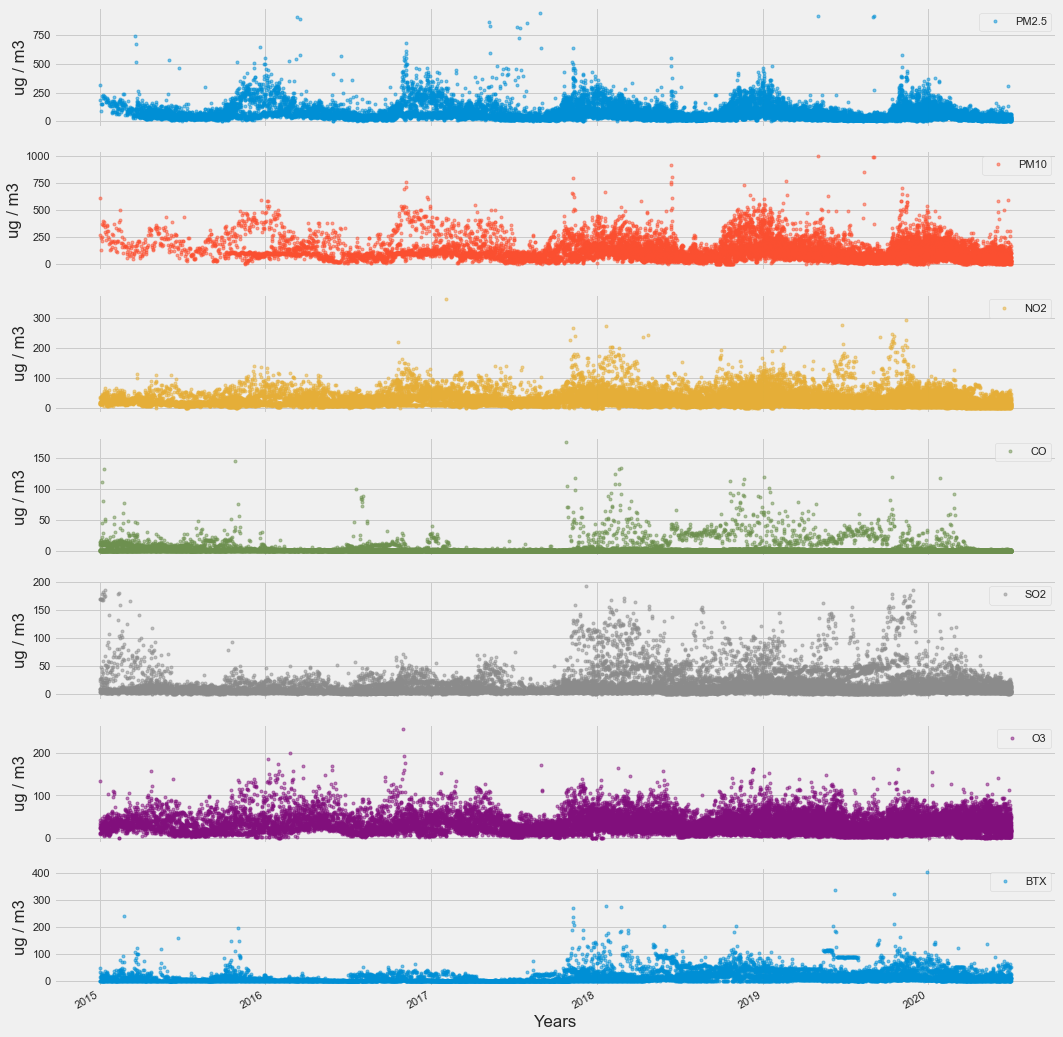

In [103]:
city_day.set_index('Date',inplace=True)
axes = city_day[pollutants].plot(marker='.', alpha=0.5, linestyle='None', figsize=(16, 20), subplots=True)
for ax in axes:
    
    ax.set_xlabel('Years')
    ax.set_ylabel('ug / m3')

In [104]:
def trend_plot(dataframe,value):
    
    # Prepare data
    df['year'] = [d.year for d in df.Date]
    df['month'] = [d.strftime('%b') for d in df.Date]
    years = df['year'].unique()

    # Draw Plot
    fig, axes = plt.subplots(1, 2, figsize=(14,6), dpi= 80)
    sns.boxplot(x='year', y=value, data=df, ax=axes[0])
    sns.pointplot(x='month', y=value, data=df.loc[~df.year.isin([2015, 2020]), :])

    # Set Title
    axes[0].set_title('Year-wise Box Plot \n(The Trend)', fontsize=18); 
    axes[1].set_title('Month-wise Plot \n(The Seasonality)', fontsize=18)
    plt.show()

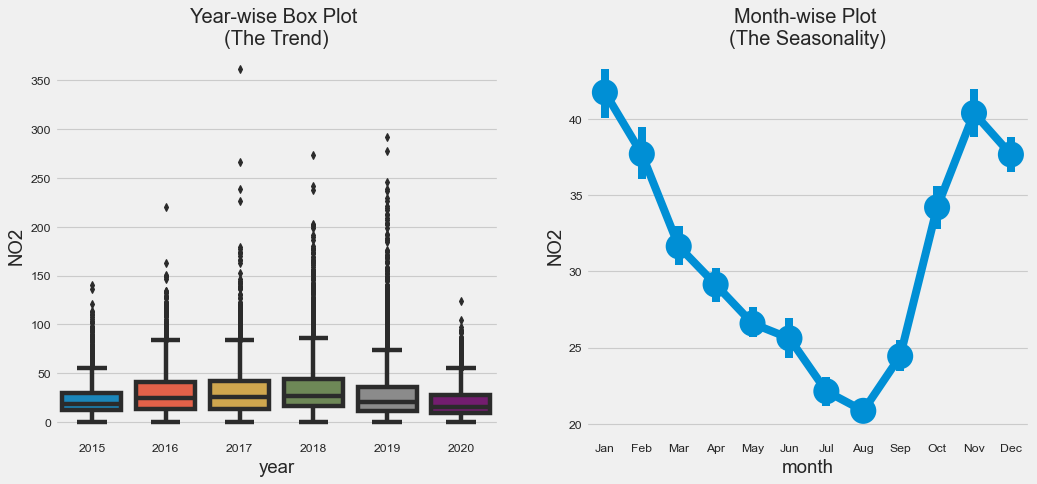

In [105]:
city_day.reset_index(inplace=True)
df = city_day.copy()
value='NO2'
trend_plot(df,value)

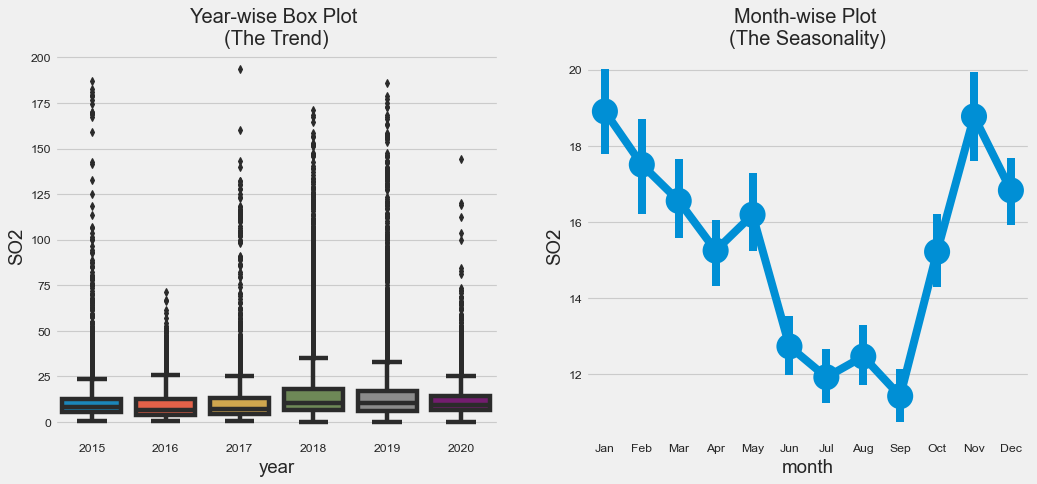

In [106]:
#city_day.reset_index(inplace=True)
df = city_day.copy()
value='SO2'
trend_plot(df,value)

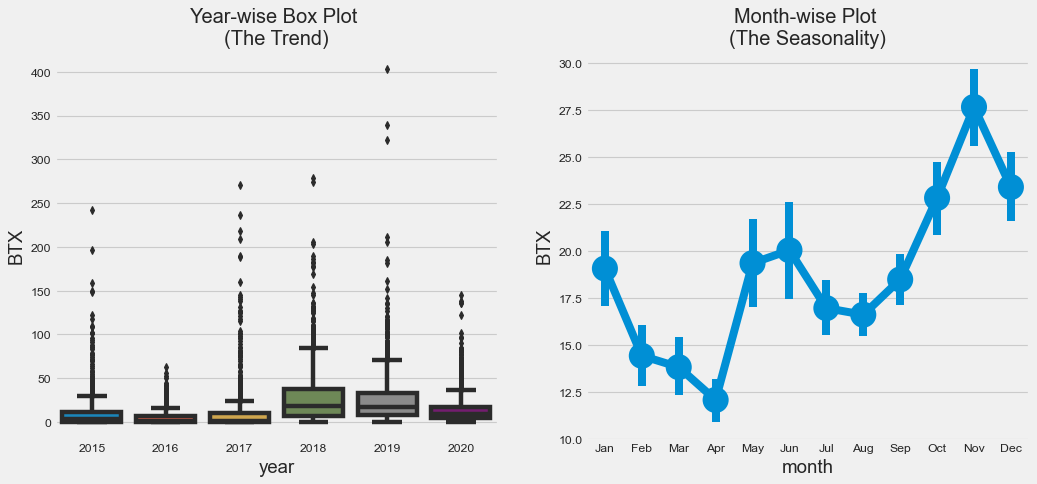

In [107]:
value='BTX'
trend_plot(df,value)

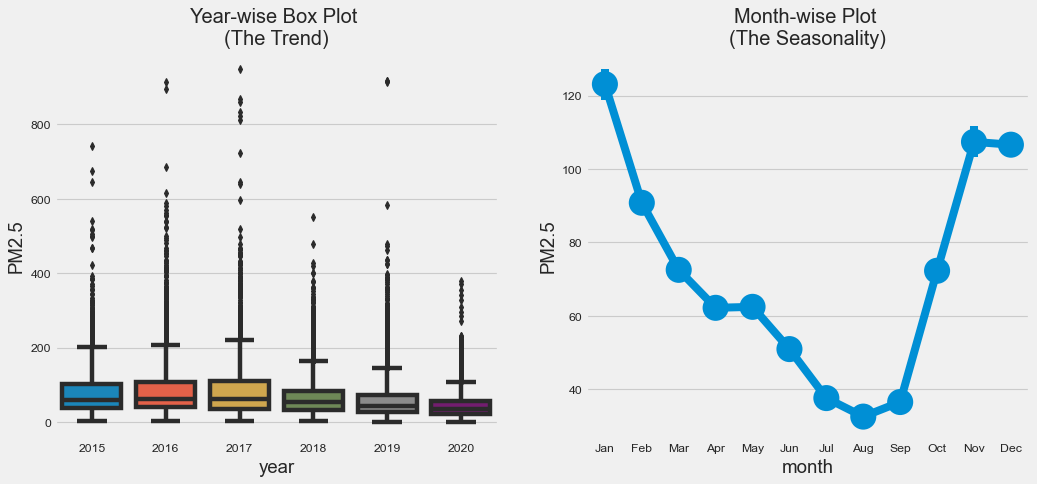

In [108]:
value='PM2.5'
trend_plot(df,value)

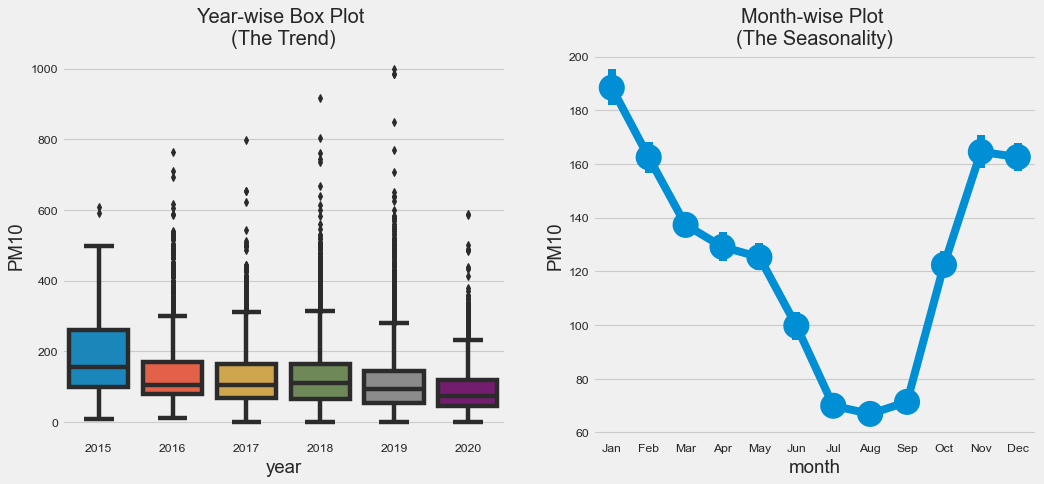

In [109]:
value='PM10'
trend_plot(df,value)

In [110]:
def max_polluted_city(pollutant):
    x1 = city_day[[pollutant,'City']].groupby(["City"]).mean().sort_values(by=pollutant,ascending=False).reset_index()
    x1[pollutant] = round(x1[pollutant],2)
    return x1[:10].style.background_gradient(cmap='OrRd')

In [111]:
from IPython.display import display_html
def display_side_by_side(*args):
    html_str=''
    for df in args:
        html_str+=df.render()
    display_html(html_str.replace('table','table style="display:inline"'),raw=True)

In [112]:
pm2_5 = max_polluted_city('PM2.5')
pm10 = max_polluted_city('PM10')
no2 = max_polluted_city('NO2')
so2 = max_polluted_city('SO2')
co = max_polluted_city('CO')
btx = max_polluted_city('BTX')


display_side_by_side(pm2_5,pm10,no2,so2,co,btx)

City PM2.5 
 
 0 
 Patna 
 123.500000 
 
 
 1 
 Delhi 
 117.200000 
 
 
 2 
 Gurugram 
 117.100000 
 
 
 3 
 Lucknow 
 109.710000 
 
 
 4 
 Ahmedabad 
 67.850000 
 
 
 5 
 Kolkata 
 64.360000 
 
 
 6 
 Jorapokhar 
 64.230000 
 
 
 7 
 Brajrajnagar 
 64.060000 
 
 
 8 
 Guwahati 
 63.690000 
 
 
 9 
 Talcher 
 61.410000 
 
 City PM10 
 
 0 
 Delhi 
 232.810000 
 
 
 1 
 Gurugram 
 191.500000 
 
 
 2 
 Talcher 
 165.770000 
 
 
 3 
 Jorapokhar 
 149.660000 
 
 
 4 
 Patna 
 126.750000 
 
 
 5 
 Brajrajnagar 
 124.220000 
 
 
 6 
 Jaipur 
 123.480000 
 
 
 7 
 Bhopal 
 119.320000 
 
 
 8 
 Guwahati 
 116.600000 
 
 
 9 
 Kolkata 
 115.630000 
 
 City NO2 
 
 0 
 Ahmedabad 
 59.030000 
 
 
 1 
 Delhi 
 50.790000 
 
 
 2 
 Kolkata 
 40.400000 
 
 
 3 
 Patna 
 37.490000 
 
 
 4 
 Visakhapatnam 
 37.190000 
 
 
 5 
 Lucknow 
 33.240000 
 
 
 6 
 Jaipur 
 32.420000 
 
 
 7 
 Bhopal 
 31.350000 
 
 
 8 
 Coimbatore 
 28.780000 
 
 
 9 
 Hyderabad 
 28.390000 
 
 City SO2 
 
 0 
 Ahmedabad 
 55.250000 
 
 
 1 
 Jorapokhar 
 33.650000 
 
 
 2 
 Talcher 
 28.490000 
 
 
 3 
 Patna 
 22.130000 
 
 
 4 
 Kochi 
 17.600000 
 
 
 5 
 Delhi 
 15.900000 
 
 
 6 
 Mumbai 
 15.200000 
 
 
 7 
 Guwahati 
 14.660000 
 
 
 8 
 Amaravati 
 14.260000 
 
 
 9 
 Bhopal 
 13.060000 
 
 City CO 
 
 0 
 Ahmedabad 
 22.190000 
 
 
 1 
 Lucknow 
 2.130000 
 
 
 2 
 Delhi 
 1.980000 
 
 
 3 
 Talcher 
 1.850000 
 
 
 4 
 Bengaluru 
 1.840000 
 
 
 5 
 Brajrajnagar 
 1.800000 
 
 
 6 
 Ernakulam 
 1.630000 
 
 
 7 
 Patna 
 1.530000 
 
 
 8 
 Kochi 
 1.300000 
 
 
 9 
 Gurugram 
 1.260000 
 
 City BTX 
 
 0 
 Kolkata 
 38.230000 
 
 
 1 
 Ahmedabad 
 37.110000 
 
 
 2 
 Delhi 
 26.860000 
 
 
 3 
 Patna 
 17.430000 
 
 
 4 
 Visakhapatnam 
 15.030000 
 
 
 5 
 Gurugram 
 14.600000 
 
 
 6 
 Amritsar 
 14.580000 
 
 
 7 
 Hyderabad 
 10.730000 
 
 
 8 
 Chandigarh 
 9.090000 
 
 
 9 
 Amaravati 
 3.680000

In [113]:
x2= city_day[['PM2.5','City']].groupby(["City"]).median().sort_values(by='PM2.5',ascending=False).reset_index()
x3 = city_day[['PM10','City']].groupby(["City"]).median().sort_values(by='PM10',ascending=False).reset_index()

from plotly.subplots import make_subplots
fig = make_subplots(
    rows=1, cols=2,
    subplot_titles=("PM2.5","PM10"))

fig.add_trace(go.Bar( y=x2['PM2.5'], x=x2["City"],  
                     marker=dict(color=x2['PM2.5'], coloraxis="coloraxis")),
              1, 1)


fig.add_trace(go.Bar( y=x3['PM10'], x=x2["City"],  
                     marker=dict(color=x3['PM10'], coloraxis="coloraxis")),
              1, 2)
fig.update_layout(coloraxis=dict(colorscale='reds'), showlegend=False,plot_bgcolor='white')
fig.update_xaxes(ticks="outside", tickwidth=2,tickangle=45, tickcolor='crimson', ticklen=10,title_text="cities")
fig.update_yaxes(title_text="ug / m3", row=1, col=1)
fig.update_yaxes(title_text="ug / m3", row=1, col=2)
fig.show()

In [114]:
x4= city_day[['CO','City']].groupby(["City"]).median().sort_values(by='CO',ascending=False).reset_index()
x5 = city_day[['NO2','City']].groupby(["City"]).median().sort_values(by='NO2',ascending=False).reset_index()
x6 = city_day[['SO2','City']].groupby(["City"]).median().sort_values(by='SO2',ascending=False).reset_index()


from plotly.subplots import make_subplots
fig = make_subplots(
    rows=1, cols=3,
    subplot_titles=("CO","NO2",'SO2'))

fig.add_trace(go.Bar( y=x4['CO'], x=x4["City"],  
                     marker=dict(color=x4['CO'], coloraxis="coloraxis")),
              1, 1)


fig.add_trace(go.Bar( y=x5['NO2'], x=x5["City"],  
                     marker=dict(color=x5['NO2'], coloraxis="coloraxis")),
              1, 2)

fig.add_trace(go.Bar( y=x6['SO2'], x=x5["City"],  
                     marker=dict(color=x6['SO2'], coloraxis="coloraxis")),
              1, 3)
fig.update_layout(coloraxis=dict(colorscale='reds'), showlegend=False,plot_bgcolor='white')
fig.update_xaxes(ticks="outside", tickwidth=2,tickangle=45, tickcolor='crimson', ticklen=10,title_text="cities")
fig.update_yaxes(title_text="ug / m3", row=1, col=1)
fig.update_yaxes(title_text="ug / m3", row=1, col=2)
fig.update_yaxes(title_text="ug / m3", row=1, col=3)
fig.show()

In [115]:
cities = ['Ahmedabad','Delhi','Bengaluru','Mumbai','Hyderabad','Chennai']

filtered_city_day = city_day[city_day['Date'] >= '2019-01-01']
AQI = filtered_city_day[filtered_city_day.City.isin(cities)][['Date','City','AQI','AQI_Bucket']]
AQI.head()

Date       City     AQI AQI_Bucket
1461 2019-01-01  Ahmedabad  1474.0     Severe
1462 2019-01-02  Ahmedabad  1246.0     Severe
1463 2019-01-03  Ahmedabad  1719.0     Severe
1464 2019-01-04  Ahmedabad  1264.0     Severe
1465 2019-01-05  Ahmedabad  1127.0     Severe

In [116]:
AQI_pivot = AQI.pivot(index='Date', columns='City', values='AQI')
AQI_pivot.fillna(method='bfill',inplace=True)


from plotly.subplots import make_subplots
import plotly.graph_objects as go

fig = make_subplots(
    rows=6, cols=1,
    #specs=[[{}, {}],
          # [{"colspan": 6}, None]],
    subplot_titles=("Ahmedabad","Bengaluru","Chennai","Delhi",'Hyderabad','Mumbai'))

fig.add_trace(go.Bar(x=AQI_pivot.index, y=AQI_pivot['Ahmedabad'],
                    marker=dict(color=AQI_pivot['Ahmedabad'],coloraxis="coloraxis")),
              1, 1)
fig.add_trace(go.Bar(x=AQI_pivot.index, y=AQI_pivot['Bengaluru'],
                    marker=dict(color=AQI_pivot['Bengaluru'], coloraxis="coloraxis")),
              2, 1)
fig.add_trace(go.Bar(x=AQI_pivot.index, y=AQI_pivot['Chennai'],
                    marker=dict(color=AQI_pivot['Chennai'], coloraxis="coloraxis")),
              3, 1)
fig.add_trace(go.Bar(x=AQI_pivot.index, y=AQI_pivot['Delhi'],
                    marker=dict(color=AQI_pivot['Delhi'], coloraxis="coloraxis")),
              4, 1)
fig.add_trace(go.Bar(x=AQI_pivot.index, y=AQI_pivot['Hyderabad'],
                    marker=dict(color=AQI_pivot['Hyderabad'], coloraxis="coloraxis")),
              5, 1)
fig.add_trace(go.Bar(x=AQI_pivot.index, y=AQI_pivot['Mumbai'],
                    marker=dict(color=AQI_pivot['Mumbai'], coloraxis="coloraxis")),
              6, 1)

fig.update_layout(coloraxis=dict(colorscale='Temps'),showlegend=False,title_text="AQI Levels")

fig.update_layout(plot_bgcolor='white')

fig.update_layout( width=800,height=1200,shapes=[
      dict(
      type= 'line',
      yref= 'paper', y0= 0, y1= 1,
      xref= 'x', x0= '2020-03-25', x1= '2020-03-25'
    )
])

fig.show()

In [117]:
AQI_beforeLockdown = AQI_pivot['2020-01-01':'2020-03-25']
AQI_afterLockdown = AQI_pivot['2020-03-26':'2020-05-01']

In [118]:
print(AQI_beforeLockdown.mean())
print(AQI_afterLockdown.mean())

City
Ahmedabad    383.776471
Bengaluru     96.023529
Chennai       80.317647
Delhi        246.305882
Hyderabad     94.435294
Mumbai       148.776471
dtype: float64
City
Ahmedabad    127.810811
Bengaluru     68.486486
Chennai       62.351351
Delhi        107.270270
Hyderabad     65.567568
Mumbai        73.891892
dtype: float64


In [119]:
# Helper functions

#source: http://nicolasfauchereau.github.io/climatecode/posts/drawing-a-gauge-with-matplotlib/
from matplotlib.patches import Circle, Wedge, Rectangle

def degree_range(n): 
    start = np.linspace(0,180,n+1, endpoint=True)[0:-1]
    end = np.linspace(0,180,n+1, endpoint=True)[1::]
    mid_points = start + ((end-start)/2.)
    return np.c_[start, end], mid_points

def rot_text(ang): 
    rotation = np.degrees(np.radians(ang) * np.pi / np.pi - np.radians(90))
    return rotation


In [120]:
#source: http://nicolasfauchereau.github.io/climatecode/posts/drawing-a-gauge-with-matplotlib/
from matplotlib.patches import Circle, Wedge, Rectangle
def gauge(labels=['GOOD','SATISFACTORY','MODERATE','POOR','VERY POOR','EXTREME'], \
          colors='jet_r', arrow=1, title='', fname=False): 
    
    """
    some sanity checks first
    

"""
    
    N = len(labels)
    
    if arrow > N: 
        raise Exception("\n\nThe category ({}) is greated than \
        the length\nof the labels ({})".format(arrow, N))
 
    """
    if colors is a string, we assume it's a matplotlib colormap
    and we discretize in N discrete colors 
    """
    
    if isinstance(colors, str):
        cmap = cm.get_cmap(colors, N)
        cmap = cmap(np.arange(N))
        colors = cmap[::-1,:].tolist()
    if isinstance(colors, list): 
        if len(colors) == N:
            colors = colors[::-1]
        else: 
            raise Exception("\n\nnumber of colors {} not equal \
            to number of categories{}\n".format(len(colors), N))

    """
    begins the plotting
    """
    
    fig, ax = plt.subplots()

    ang_range, mid_points = degree_range(N)

    labels = labels[::-1]
    
    """
    plots the sectors and the arcs
    """
    patches = []
    for ang, c in zip(ang_range, colors): 
        # sectors
        patches.append(Wedge((0.,0.), .4, *ang, facecolor='w', lw=2))
        # arcs
        patches.append(Wedge((0.,0.), .4, *ang, width=0.10, facecolor=c, lw=2, alpha=0.5))
    
    [ax.add_patch(p) for p in patches]

    
    """
    set the labels (e.g. 'LOW','MEDIUM',...)
    """

    for mid, lab in zip(mid_points, labels): 

        ax.text(0.35 * np.cos(np.radians(mid)), 0.35 * np.sin(np.radians(mid)), lab, \
            horizontalalignment='center', verticalalignment='center', fontsize=14, \
            fontweight='bold', rotation = rot_text(mid))

    """
    set the bottom banner and the title
    """
    r = Rectangle((-0.4,-0.1),0.8,0.1, facecolor='w', lw=2)
    ax.add_patch(r)
    
    ax.text(0, -0.05, title, horizontalalignment='center', \
         verticalalignment='center', fontsize=22, fontweight='bold')

    """
    plots the arrow now
    """
    
    pos = mid_points[abs(arrow - N)]
    
    ax.arrow(0, 0, 0.225 * np.cos(np.radians(pos)), 0.225 * np.sin(np.radians(pos)), \
                 width=0.04, head_width=0.09, head_length=0.1, fc='k', ec='k')
    
    ax.add_patch(Circle((0, 0), radius=0.02, facecolor='k'))
    ax.add_patch(Circle((0, 0), radius=0.01, facecolor='w', zorder=11))

    """
    removes frame and ticks, and makes axis equal and tight
    """
    
    ax.set_frame_on(False)
    ax.axes.set_xticks([])
    ax.axes.set_yticks([])
    ax.axis('equal')
    plt.tight_layout()
    if fname:
        fig.savefig(fname, dpi=200)

"Ahmedabad's AQI levels"

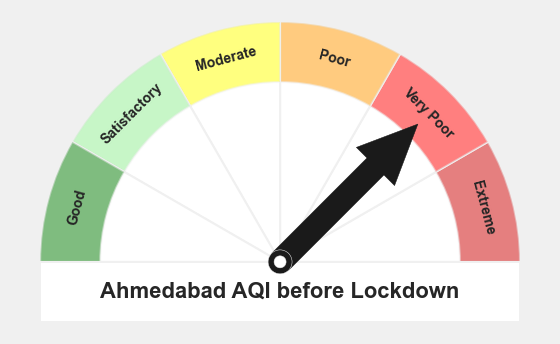

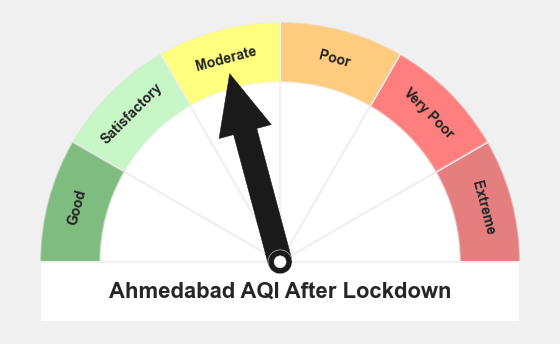

In [121]:
display("Ahmedabad's AQI levels")

gauge(labels=['Good','Satisfactory','Moderate','Poor','Very Poor','Extreme'], \
      colors=['#007A00','#90EE90','#ffff00','#FF9900','#ff0000','#CC0000'], arrow=5, title='Ahmedabad AQI before Lockdown') 

gauge(labels=['Good','Satisfactory','Moderate','Poor','Very Poor','Extreme'], \
      colors=['#007A00','#90EE90','#ffff00','#FF9900','#ff0000','#CC0000'], arrow=3, title='Ahmedabad AQI After Lockdown') 

"Delhi's AQI levels"

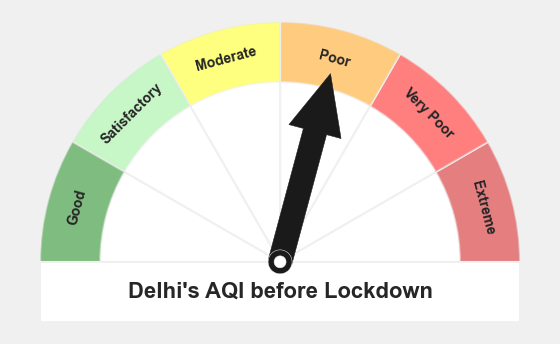

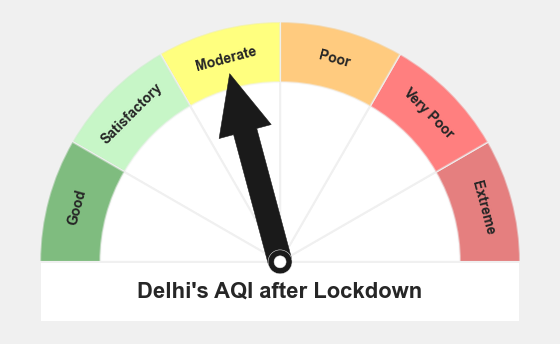

In [122]:
display("Delhi's AQI levels")

gauge(labels=['Good','Satisfactory','Moderate','Poor','Very Poor','Extreme'], \
      colors=['#007A00','#90EE90','#ffff00','#FF9900','#ff0000','#CC0000'], arrow=4, title="Delhi's AQI before Lockdown") 

gauge(labels=['Good','Satisfactory','Moderate','Poor','Very Poor','Extreme'], \
      colors=['#007A00','#90EE90','#ffff00','#FF9900','#ff0000','#CC0000'], arrow=3, title="Delhi's AQI after Lockdown") 

"Mumbai's AQI levels"

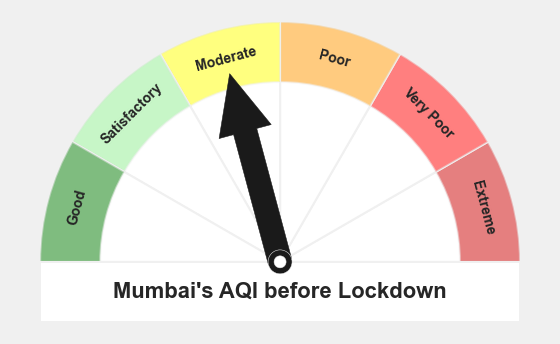

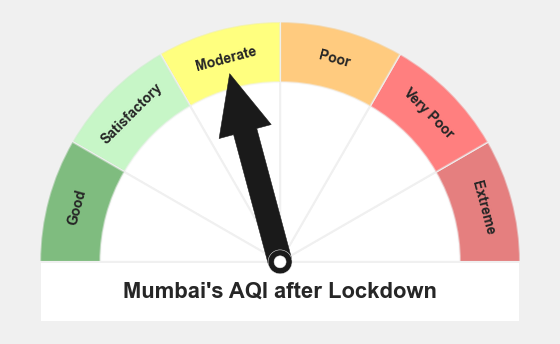

In [123]:
display("Mumbai's AQI levels")

gauge(labels=['Good','Satisfactory','Moderate','Poor','Very Poor','Extreme'], \
      colors=['#007A00','#90EE90','#ffff00','#FF9900','#ff0000','#CC0000'], arrow=3, title="Mumbai's AQI before Lockdown") 

gauge(labels=['Good','Satisfactory','Moderate','Poor','Very Poor','Extreme'], \
      colors=['#007A00','#90EE90','#ffff00','#FF9900','#ff0000','#CC0000'], arrow=3, title="Mumbai's AQI after Lockdown") 

In [131]:
#city_day.set_index('Date',inplace=True)

start_date1 = '2019-01-01'
end_date1 = '2019-05-01'

mask1 = (city_day['Date'] >= start_date1) & (city_day['Date']  <= end_date1)
pollutants_filtered_2019 = city_day.loc[mask1]
pollutants_filtered_2019.fillna(method='bfill',inplace=True)
pollutants_filtered_2019.set_index('Date',inplace=True);

start_date2 = '2020-01-01'
end_date2 = '2020-05-01'

mask2 = (city_day['Date'] >= start_date2) & (city_day['Date']  <= end_date2)
pollutants_filtered_2020 = city_day.loc[mask2]
pollutants_filtered_2020.fillna(method='bfill',inplace=True)
pollutants_filtered_2020.set_index('Date',inplace=True);

df1 = pollutants_filtered_2019[pollutants_filtered_2019.City.isin(cities)][['City','NO2','SO2','PM2.5','CO']]
df2 = pollutants_filtered_2020[pollutants_filtered_2020.City.isin(cities)][['City','NO2','SO2','PM2.5','CO']]

In [132]:
def pollution_comparison(city):
    """
    Function to plot graph comparing pollutin levels between (Jan-May)2019 and (Jan-May)2020
    
    """
    
    fig = go.Figure()
    fig.add_trace(go.Scatter(x=df1.index, y=df1[df1['City']==city]['NO2'],
                    line=dict(dash='solid',color='green'),name='NO2'))
    fig.add_trace(go.Scatter(x=df1.index, y=df1[df1['City']==city]['SO2'],
                    line=dict(dash='dot',color='red'),name='SO2'))
    fig.add_trace(go.Scatter(x=df1.index, y=df1[df1['City']==city]['PM2.5'],
                    line=dict(dash='dashdot',color='dodgerblue'),name='Particulate_Matter'))
    fig.add_trace(go.Scatter(x=df1.index, y=df1[df1['City']==city]['CO'],
                    line=dict(dash='longdashdot'),mode='lines',name='CO'))
    fig.update_layout(title_text=city+' 2019 ',plot_bgcolor='white')
    fig.update_xaxes(rangeslider_visible=True,zeroline=True,zerolinewidth=1, zerolinecolor='Black')
    fig.show()

    fig = go.Figure()
    fig.add_trace(go.Scatter(x=df2.index, y=df2[df2['City']==city]['NO2'],
                    line=dict(dash='solid',color='green'),name='NO2'))
    fig.add_trace(go.Scatter(x=df2.index, y=df2[df2['City']==city]['SO2'],
                    line=dict(dash='dot',color='red'),name='SO2'))
    fig.add_trace(go.Scatter(x=df2.index, y=df2[df2['City']==city]['PM2.5'],
                    line=dict(dash='dashdot',color='dodgerblue'),name='Particulate_Matter'))
    fig.add_trace(go.Scatter(x=df2.index, y=df2[df2['City']==city]['CO'],
                    line=dict(dash='longdashdot'),mode='lines',name='CO'))
    fig.update_layout(title_text=city+' 2020 ',plot_bgcolor='white')
    fig.update_xaxes(rangeslider_visible=True,zeroline=True,zerolinewidth=1, zerolinecolor='Black')
    fig.show()


In [133]:
pollution_comparison('Ahmedabad')

In [134]:
pollution_comparison('Bengaluru')

In [135]:
pollution_comparison('Chennai')

In [136]:
pollution_comparison('Delhi')

In [137]:
pollution_comparison('Mumbai')

In [138]:
pollution_comparison('Hyderabad')

In [143]:
df11 = pollutants_filtered_2019[['City','AQI']]
df22 = pollutants_filtered_2020[['City','AQI']]

df_2019_coord = df11.groupby('City')['AQI'].mean().to_frame().reset_index()
df_2020_coord = df22.groupby('City')['AQI'].mean().to_frame().reset_index()

df_2019_AQI = pd.merge(df_2019_coord,cities_db,on='City')
df_2019_AQI['AQI'] = df_2019_AQI['AQI'].round(0)
df_2020_AQI = pd.merge(df_2020_coord,cities_db,on='City')
df_2020_AQI['AQI'] = df_2020_AQI['AQI'].round(0)

In [144]:
m = plugins.DualMap(location=(22.9734, 78.6569), tiles=None, zoom_start=5)

folium.TileLayer('Stamen Toner').add_to(m)
folium.TileLayer('openstreetmap').add_to(m)


fg_1 = folium.FeatureGroup(name='2019').add_to(m.m1)
fg_2 = folium.FeatureGroup(name='2020').add_to(m.m2)



for lat, lon, value, name in zip(df_2019_AQI['Lat'], df_2019_AQI['Long'], df_2019_AQI['AQI'], df_2019_AQI['City']):
    folium.CircleMarker([lat, lon],
                        radius=10,
                        icon=folium.Icon(color='red'),
                        popup = ('<strong>City</strong>: ' + str(name).capitalize() + '<br>'
                                '<strong>AQI(Average)</strong>: ' + str(value) + '<br>'),
                        fill_color='red',
                        fill_opacity=0.7 ).add_to(fg_1)





for lat, lon, value, name in zip(df_2020_AQI['Lat'], df_2020_AQI['Long'], df_2020_AQI['AQI'], df_2020_AQI['City']):
    folium.CircleMarker([lat, lon],
                        radius=10,
                        icon=folium.Icon(color='orange'),
                        popup = ('<strong>City</strong>: ' + str(name).capitalize() + '<br>'
                                '<strong>AQI(Average)</strong>: ' + str(value) + '<br>'),
                        fill_color='orange',
                        fill_opacity=0.7 ).add_to(fg_2)


folium.LayerControl(collapsed=False).add_to(m)

m